In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from linearmodels import PooledOLS
from linearmodels import PanelOLS
import statsmodels.api as sm
import numpy.linalg as la
from scipy import stats

In [5]:
df = pd.read_csv('taroutput.csv', 
                 usecols = ['Country','Countryid','Device','Delta','rho0','rho0se','rho1','rho1se','noobs','Threshold','Transactioncost'],\
                 index_col = ['Country'])

In [62]:
df = df.reset_index()[df.reset_index()['Country'] != 'ALL'].set_index('Country')
df[df['Device']=='iPad Pro Large']

,Countryid,Device,Delta,rho0,rho0se,rho1,rho1se,noobs,Threshold,Transactioncost
Country,,,,,,,,,,
AE,1,iPad Pro Large,12,0.947,0.145,-0.132,0.025,302,0.0117,0.03328
AT,2,iPad Pro Large,12,-0.097,0.066,-0.423,0.050,302,0.0476,0.20000
AU,3,iPad Pro Large,12,0.694,0.254,-0.437,0.046,302,0.0281,0.10000
BE,4,iPad Pro Large,12,-0.047,0.074,-0.429,0.049,302,0.0442,0.21000
BR,5,iPad Pro Large,12,-0.042,0.055,-0.572,0.055,302,0.1449,0.29250
...,...,...,...,...,...,...,...,...,...,...
SG,30,iPad Pro Large,48,-1.037,0.061,NaN,NaN,266,NaN,0.07000
TH,31,iPad Pro Large,48,-1.320,0.126,-0.888,0.093,266,0.0387,0.07000
TR,32,iPad Pro Large,48,-1.976,0.125,-0.990,0.067,266,0.0909,0.18000


In [52]:
dfrho0 = pd.DataFrame({'rho0':df['rho0']})
dfrho0['Rho'] = 'Inner'
dfrho0['Device'] = df['Device']
dfrho0['Delta'] = df['Delta']

dfrho1 = pd.DataFrame({'rho1':df['rho1']})
dfrho1['Rho'] = 'Outer'
dfrho1['Device'] = df['Device']
dfrho1['Delta'] = df['Delta']

dfrho = dfrho0.append(dfrho1)
dfrho

C:\Users\rickw\AppData\Local\Temp\ipykernel_6776\631446254.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrho = dfrho0.append(dfrho1)


,rho0,Rho,Device,Delta,rho1
Country,,,,,
AE,0.947,Inner,iPad Pro Large,12,NaN
AT,-0.097,Inner,iPad Pro Large,12,NaN
AU,0.694,Inner,iPad Pro Large,12,NaN
BE,-0.047,Inner,iPad Pro Large,12,NaN
BR,-0.042,Inner,iPad Pro Large,12,NaN
...,...,...,...,...,...
SG,NaN,Outer,iPad Mini,48,-0.969
TH,NaN,Outer,iPad Mini,48,-0.555
TR,NaN,Outer,iPad Mini,48,-1.173


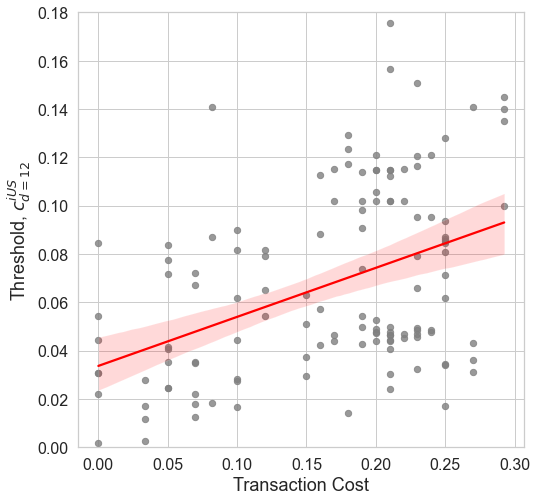

In [50]:
d = 12
plt.figure(figsize=(8,8))
regdata = df[df['Delta'] == d]
sns.regplot(data=regdata, x='Transactioncost', y='Threshold', robust=True, marker='o', scatter_kws={'s':40, "color": "grey"}, line_kws={"color": "red"})
plt.xlabel(r'Transaction Cost',size=18)
plt.ylabel(r'Threshold, $c^{iUS}_{d='+str(d)+'}$',size=18)
plt.tick_params(labelsize=16)
plt.ylim(0,0.18)
plt.savefig('figregctc12.png',transparent=True, bbox_inches='tight')

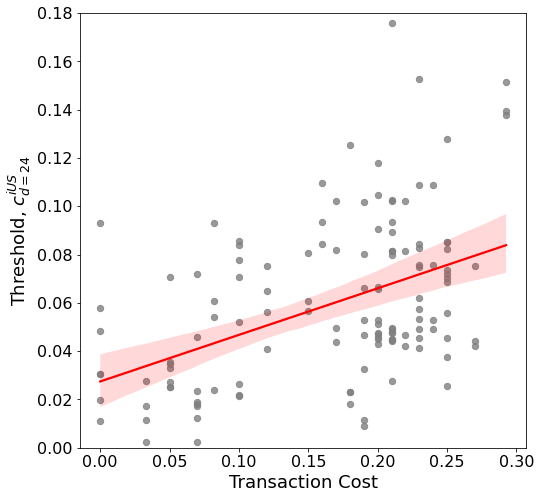

In [8]:
d = 24
plt.figure(figsize=(8,8))
regdata = df[df['Delta'] == d]
sns.regplot(data=regdata, x='Transactioncost', y='Threshold', robust=True, marker='o', scatter_kws={'s':40, "color": "grey"}, line_kws={"color": "red"})
plt.xlabel(r'Transaction Cost',size=18)
plt.ylabel(r'Threshold, $c^{iUS}_{d='+str(d)+'}$',size=18)
plt.tick_params(labelsize=16)
plt.ylim(0,0.18)
plt.savefig('figregctc24.png',transparent=True, bbox_inches='tight')

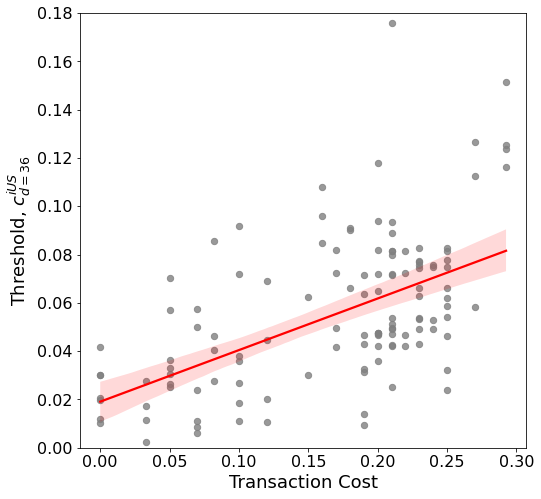

In [9]:
d = 36
plt.figure(figsize=(8,8))
regdata = df[df['Delta'] == d]
sns.regplot(data=regdata, x='Transactioncost', y='Threshold', robust=True, marker='o', scatter_kws={'s':40, "color": "grey"}, line_kws={"color": "red"})
plt.xlabel(r'Transaction Cost',size=18)
plt.ylabel(r'Threshold, $c^{iUS}_{d='+str(d)+'}$',size=18)
plt.tick_params(labelsize=16)
plt.ylim(0,0.18)
plt.savefig('figregctc36.png',transparent=True, bbox_inches='tight')

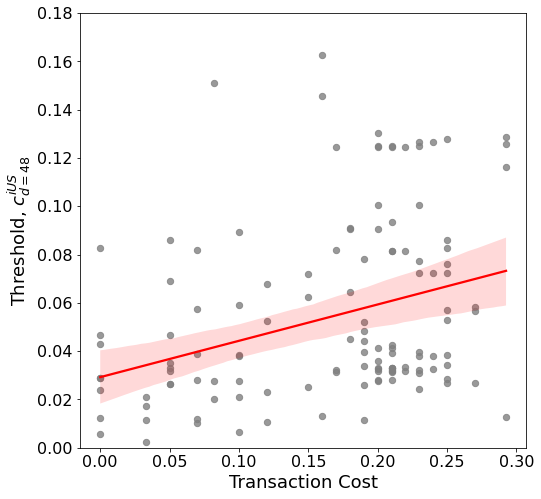

In [10]:
d = 48
plt.figure(figsize=(8,8))
regdata = df[df['Delta'] == d]
sns.regplot(data=regdata, x='Transactioncost', y='Threshold', robust=True, marker='o', scatter_kws={'s':40, "color": "grey"}, line_kws={"color": "red"})
plt.xlabel(r'Transaction Cost',size=18)
plt.ylabel(r'Threshold, $c^{iUS}_{d='+str(d)+'}$',size=18)
plt.tick_params(labelsize=16)
plt.ylim(0,0.18)
plt.savefig('figregctc48.png',transparent=True, bbox_inches='tight')

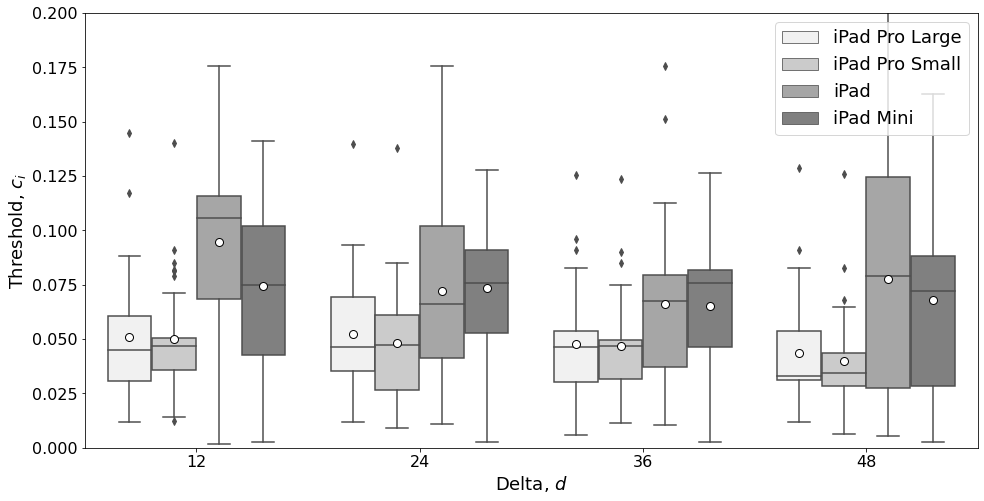

In [20]:
plt.figure(figsize=(16,8))

sns.boxplot(data=df, x='Delta', y='Threshold', hue='Device', showmeans=True, color='grey',
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"8"})

plt.xlabel(r'Delta, $d$',size=18)
plt.ylabel('Threshold, $c_i$',size=18)
plt.ylim(0,0.20)
plt.tick_params(labelsize=16)
#plt.legend(fontsize='large')
plt.legend(loc='upper right', fontsize=18)
plt.savefig('figboxplotthreshold.png',transparent=True, bbox_inches='tight')

In [21]:
df1 = pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)
df2 = pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)

In [115]:
df1['Rho'] = df['rho0']
df1['Threshold'] = 'Inner'
df1['Delta'] = df['Delta']
df1['Device'] = df['Device']

df2['Rho'] = df['rho1']
df2['Threshold'] = 'Outer'
df2['Delta'] = df['Delta']
df2['Device'] = df['Device']

In [116]:
df3 = df1.append(df2)

C:\Users\rickw\AppData\Local\Temp\ipykernel_6776\3559124262.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df1.append(df2)


In [117]:
df3 = df3.reset_index()[df3.reset_index()['Country'] != 'ALL'].set_index('Country')

In [118]:
df3

,Rho,Threshold,Delta,Device
Country,,,,
AE,0.947,Inner,12,iPad Pro Large
AT,-0.097,Inner,12,iPad Pro Large
AU,0.694,Inner,12,iPad Pro Large
BE,-0.047,Inner,12,iPad Pro Large
BR,-0.042,Inner,12,iPad Pro Large
...,...,...,...,...
SG,-0.969,Outer,48,iPad Mini
TH,-0.555,Outer,48,iPad Mini
TR,-1.173,Outer,48,iPad Mini


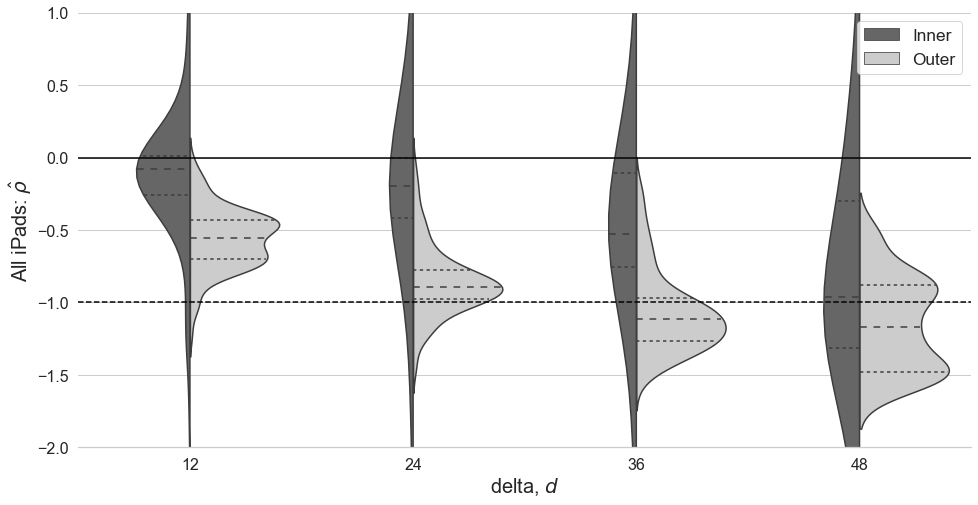

In [120]:
sns.set(rc={'figure.figsize':(16,8)})
sns.set_theme(style="whitegrid")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=df3, x='Delta', y='Rho', hue='Threshold',
               split=True, inner='quart', linewidth=1.5,
               palette={'Inner': '0.4', 'Outer': '.8'})
plt.xlabel(r'delta, $d$', size=20)
plt.ylabel(r'All iPads: $\hat{\rho}$', size=20)
plt.tick_params(labelsize=16)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.ylim([-2,1])
plt.axhline(y=0, color='black', linestyle='solid')
plt.axhline(y=-1, color='black', linestyle='dashed')

sns.despine(left=True)
plt.savefig('figviolinplotrho.png',transparent=True, bbox_inches='tight')
plt.show()

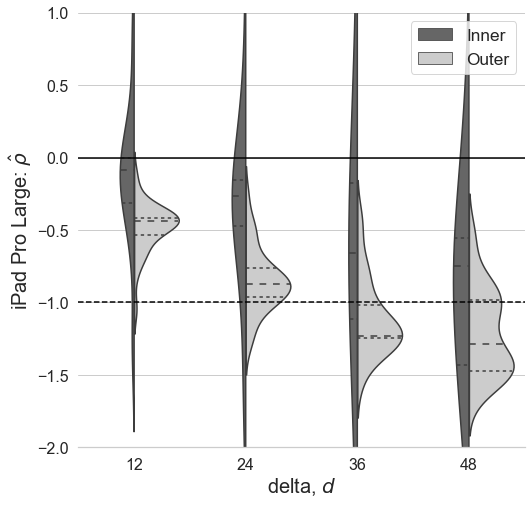

In [105]:
dfrhopl = df3[df3['Device'] == 'iPad Pro Large']

sns.set(rc={'figure.figsize':(8,8)})
sns.set_theme(style="whitegrid")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=dfrhopl, x='Delta', y='Rho', hue='Threshold',
               split=True, inner='quart', linewidth=1.5,
               palette={'Inner': '0.4', 'Outer': '.8'})
plt.xlabel(r'delta, $d$', size=20)
plt.ylabel(r'iPad Pro Large: $\hat{\rho}$', size=20)
plt.tick_params(labelsize=16)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.ylim([-2,1])
plt.axhline(y=0, color='black', linestyle='solid')
plt.axhline(y=-1, color='black', linestyle='dashed')

sns.despine(left=True)
plt.savefig('figviolinplotrhoprol.png',transparent=True, bbox_inches='tight')

plt.show()

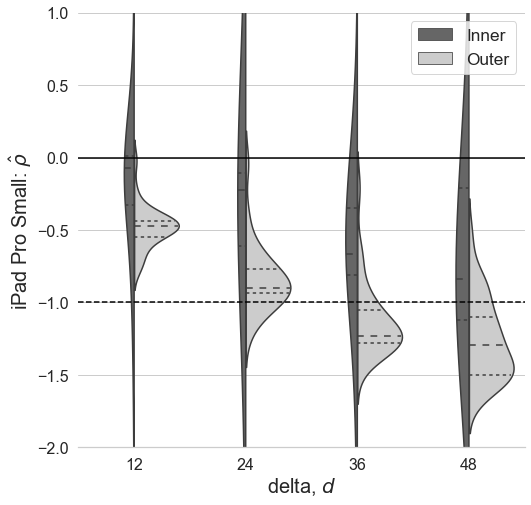

In [101]:
dfrhops = df3[df3['Device'] == 'iPad Pro Small']

sns.set(rc={'figure.figsize':(8,8)})
sns.set_theme(style="whitegrid")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=dfrhops, x='Delta', y='Rho', hue='Threshold',
               split=True, inner='quart', linewidth=1.5,
               palette={'Inner': '0.4', 'Outer': '.8'})
plt.xlabel(r'delta, $d$', size=20)
plt.ylabel(r'iPad Pro Small: $\hat{\rho}$', size=20)
plt.tick_params(labelsize=16)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.ylim([-2,1])
plt.axhline(y=0, color='black', linestyle='solid')
plt.axhline(y=-1, color='black', linestyle='dashed')

sns.despine(left=True)
plt.savefig('figviolinplotrhopros.png',transparent=True, bbox_inches='tight')

plt.show()

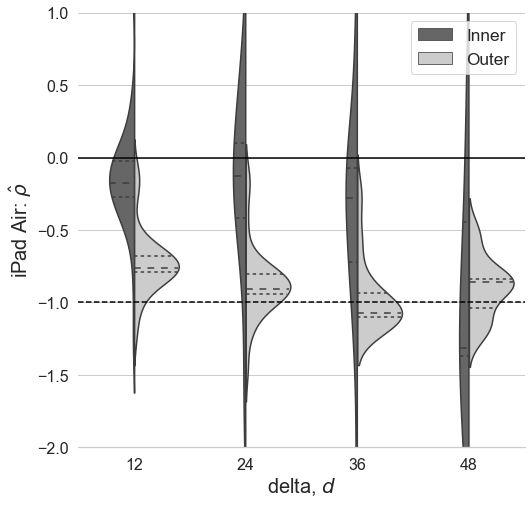

In [102]:
dfrhoip = df3[df3['Device'] == 'iPad']

sns.set(rc={'figure.figsize':(8,8)})
sns.set_theme(style="whitegrid")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=dfrhoip, x='Delta', y='Rho', hue='Threshold',
               split=True, inner='quart', linewidth=1.5,
               palette={'Inner': '0.4', 'Outer': '.8'})
plt.xlabel(r'delta, $d$', size=20)
plt.ylabel(r'iPad Air: $\hat{\rho}$', size=20)
plt.tick_params(labelsize=16)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.ylim([-2,1])
plt.axhline(y=0, color='black', linestyle='solid')
plt.axhline(y=-1, color='black', linestyle='dashed')

sns.despine(left=True)
plt.savefig('figviolinplotrhoip.png',transparent=True, bbox_inches='tight')

plt.show()

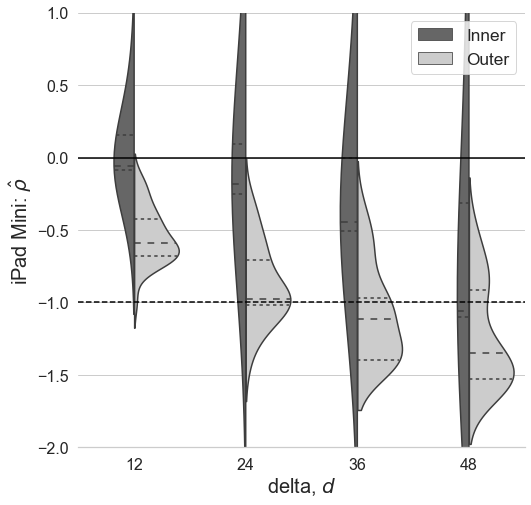

In [104]:
dfrhoipm = df3[df3['Device'] == 'iPad Mini']

sns.set(rc={'figure.figsize':(8,8)})
sns.set_theme(style="whitegrid")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=dfrhoipm, x='Delta', y='Rho', hue='Threshold',
               split=True, inner='quart', linewidth=1.5,
               palette={'Inner': '0.4', 'Outer': '.8'})
plt.xlabel(r'delta, $d$', size=20)
plt.ylabel(r'iPad Mini: $\hat{\rho}$', size=20)
plt.tick_params(labelsize=16)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.ylim([-2,1])
plt.axhline(y=0, color='black', linestyle='solid')
plt.axhline(y=-1, color='black', linestyle='dashed')

sns.despine(left=True)
plt.savefig('figviolinplotrhoipm.png',transparent=True, bbox_inches='tight')

plt.show()

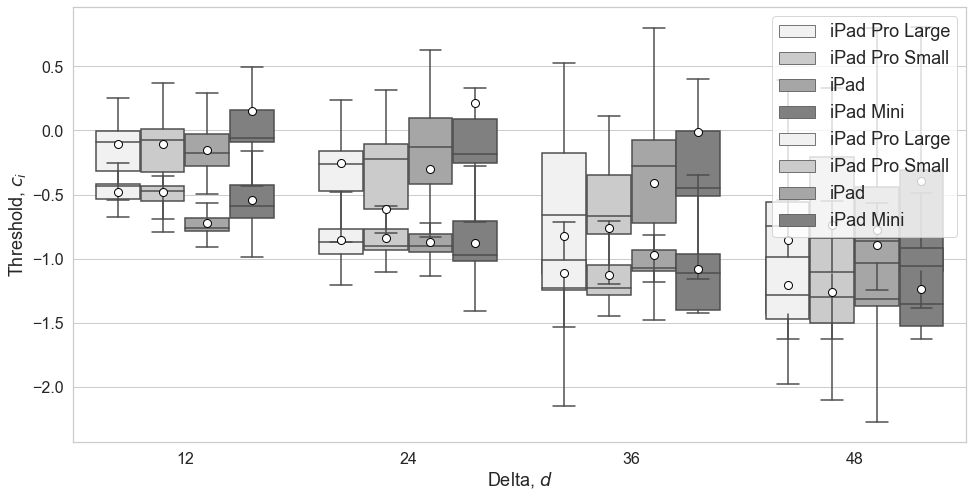

In [56]:
plt.figure(figsize=(16,8))

sns.boxplot(data=dfrho, x='Delta', y='rho0', hue='Device', showmeans=True, color='grey', showfliers = False,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"8"})

sns.boxplot(data=dfrho, x='Delta', y='rho1', hue='Device', showmeans=True, color='grey', showfliers = False,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"8"})


plt.xlabel(r'Delta, $d$',size=18)
plt.ylabel('Threshold, $c_i$',size=18)
#plt.ylim(0,0.20)
plt.tick_params(labelsize=16)
#plt.legend(fontsize='large')
plt.legend(loc='upper right', fontsize=18)
plt.savefig('figboxplotthreshold.png',transparent=True, bbox_inches='tight')

In [ ]:
sns.boxplot()

In [10]:
dffilter1 = df[df['Delta'] == 12]
dffilter2 = dffilter1[dffilter1['Device'] == 'iPad Pro Large']
dffilter2

,Countryid,Device,Delta,rho0,rho0se,rho1,rho1se,noobs,Threshold,Transactioncost
Country,,,,,,,,,,
ALL,a,iPad Pro Large,12,-0.33185,0.00891,-0.642742,0.016837,10268,0.1235,NaN
AE,1,iPad Pro Large,12,0.94700,0.14500,-0.132000,0.025000,302,0.0117,0.033280
AT,2,iPad Pro Large,12,-0.09700,0.06600,-0.423000,0.050000,302,0.0476,0.200000
AU,3,iPad Pro Large,12,0.69400,0.25400,-0.437000,0.046000,302,0.0281,0.100000
BE,4,iPad Pro Large,12,-0.04700,0.07400,-0.429000,0.049000,302,0.0442,0.210000
BR,5,iPad Pro Large,12,-0.04200,0.05500,-0.572000,0.055000,302,0.1449,0.292500
CA,6,iPad Pro Large,12,-1.32400,0.20700,-0.341000,0.043000,302,0.0247,0.050000
CZ,7,iPad Pro Large,12,0.82100,0.21700,-0.348000,0.041000,302,0.0305,0.210000
DE,8,iPad Pro Large,12,-0.13400,0.05900,-0.458000,0.056000,302,0.0543,0.190000


In [11]:
str(dffilter2['noobs']['AE'])

'302'

In [12]:
Delta = 24
Device = 'iPad Pro Large'

dffilter1 = df[df['Delta'] == Delta]
dffilter2 = dffilter1[dffilter1['Device'] == Device]
dffilter2
coeffinner = []
coeffouter = []
seinner = []
seouter = []
thold = []

countrylist = ['AE','AT','AU','BE','BR','CA','CZ','DE','DK','ES','FI','FR','HK','HU','IE','IT',
              'JP','KR','LU','MX','MY','NL','NO','NZ','PH','PL','PT','RU','SE','SG','TH','TR','TW','UK']

print('\\begin{table}[ht]' + '\\centering')
print(r'\caption{Threshold Autogregression Persistence Estimates for '+ Device +' Devices, $d = '+ str(Delta) +'$}\\label{regTAR: '+ Device + ' Delta' + str(Delta) +'}')
print('\\begin{tabular}{ c r l r l c c c } ')
print('\\hline')
print('\\hline')
print(' ')
print('& \\multicolumn{7}{c}{$i=$'+ Device +', $d='+ str(Delta) +'$, No. Observations: ' + str(dffilter2['noobs']['AE']) + '}' + '\\'+ '\\')
print('\\cline{2-8}')
print('\\'+ '\\'+'[-0.1ex]')
print('Country')
print('& \\multicolumn{1}{c}{ Inner} ')
print('& \\multicolumn{1}{c}{ Inner} ')
print('& \\multicolumn{1}{c}{ Outer} ')
print('& \\multicolumn{1}{c}{ Outer} ')
print('& \\multicolumn{1}{c}{ Threshold} ')
print('& \\multicolumn{1}{c}{ Half-life} ')
print('& \\multicolumn{1}{c}{ Half-life} '+ '\\'+ '\\')
print('')
print('& \\multicolumn{1}{c}{ $\\hat{\\rho}_{0}$ } ')
print('& \\multicolumn{1}{c}{ SE} ')
print('& \\multicolumn{1}{c}{ $\\hat{\\rho}_{1}$ } ')
print('& \\multicolumn{1}{c}{ SE} ')
print('& \\multicolumn{1}{c}{ $c_i$ } ')
print('& \\multicolumn{1}{c}{ $\\hat{\\rho}_{0}$ } ')
print('& \\multicolumn{1}{c}{ $\\hat{\\rho}_{1}$ } '+ '\\'+ '\\')
print('\\hline'+ '\\'+ '\\'+'[-0.8ex] ')

for c in countrylist:
    print(c)
    
    hl0 = np.log10(0.5) / np.log10(1+dffilter2['rho0'][c]) / (52 / Delta)
    hl1 = np.log10(0.5) / np.log10(1+dffilter2['rho1'][c]) / (52 / Delta)
    
    if hl0 < 0:
        hl0 = '$\infty$'
    elif dffilter2['rho0'][c] < -1:
        hl0 = str(0)
    else:
        hl0 = str(round(hl0,3))
        
    if hl1 < 0:
        hl1 = '$\infty$'
    elif dffilter2['rho1'][c] < -1:
        hl1 = str(0)    
    else:
        hl1 = str(round(hl1,3))
        
    # Statistical Significance Tests:
    
    if ((dffilter2['rho0'][c] / dffilter2['rho0se'][c]) > 2.576 or (dffilter2['rho0'][c] / dffilter2['rho0se'][c]) < -2.576):
                          sig0 = '***'
    elif ((dffilter2['rho0'][c] / dffilter2['rho0se'][c]) > 1.96 or (dffilter2['rho0'][c] / dffilter2['rho0se'][c]) < -1.96):
                          sig0 = '**'
    elif ((dffilter2['rho0'][c] / dffilter2['rho0se'][c]) > 1.645 or (dffilter2['rho0'][c] / dffilter2['rho0se'][c]) < -1.645):
                          sig0 = '*'
    else:
        sig0 = ''
     
    
    if ((dffilter2['rho1'][c] / dffilter2['rho1se'][c]) > 2.576 or (dffilter2['rho1'][c] / dffilter2['rho1se'][c]) < -2.576):
                          sig1 = '***'
    elif ((dffilter2['rho1'][c] / dffilter2['rho1se'][c]) > 1.96 or (dffilter2['rho1'][c] / dffilter2['rho1se'][c]) < -1.96):
                          sig1 = '**'    
    elif ((dffilter2['rho1'][c] / dffilter2['rho1se'][c]) > 1.645 or (dffilter2['rho1'][c] / dffilter2['rho1se'][c]) < -1.645):
                          sig1 = '*'
    else:
        sig1 = ''
    
    # LaTex Output:
    

    
    print('&  ' + str("%.3f" % round(dffilter2['rho0'][c],3)) + 
          '&  \\footnotesize{(' + str("%.3f" % round(dffilter2['rho0se'][c],3)) + ')' + sig0 + '}' +
          '&  ' + str("%.3f" % round(dffilter2['rho1'][c],3)) + 
          '&  \\footnotesize{(' + str("%.3f" % round(dffilter2['rho1se'][c],3)) + ')' + sig1 + '}' +
          '&  ' + str("%.3f" % round(dffilter2['Threshold'][c],3)) + 
          '&  ' + hl0 + '  &  ' + hl1 + '  \\' + '\\')  
        
    coeffinner.append(dffilter2['rho0'][c])
    coeffouter.append(dffilter2['rho1'][c])
    seinner.append(dffilter2['rho0se'][c])
    seouter.append(dffilter2['rho1se'][c])
    thold.append(dffilter2['Threshold'][c])

print('\hline')
print('\multicolumn{1}{l}{ Average }' +
          '&  ' + str("%.3f" % round(np.nanmean(coeffinner),3)) + 
          '&  ' + str("%.3f" % round(np.nanmean(seinner),3)) +    
          '&  ' + str("%.3f" % round(np.nanmean(coeffouter),3)) +  
          '&  ' + str("%.3f" % round(np.nanmean(seouter),3)) + 
          '&  ' + str("%.3f" % round(np.nanmean(thold),3)) +         
          '&  ' + str("%.3f" % round(np.log10(0.5) / np.log10(1+np.nanmean(coeffinner)) / (52 / Delta),3)) +
          '&  ' + str("%.3f" % round(np.log10(0.5) / np.log10(1+np.nanmean(coeffouter)) / (52 / Delta),3)) +'\\' + '\\')

print('\multicolumn{1}{l}{ Median }' +
          '&  ' + str("%.3f" % round(np.nanmedian(coeffinner),3)) + 
          '&  ' + str("%.3f" % round(np.nanmedian(seinner),3)) +    
          '&  ' + str("%.3f" % round(np.nanmedian(coeffouter),3)) +  
          '&  ' + str("%.3f" % round(np.nanmedian(seouter),3)) + 
          '&  ' + str("%.3f" % round(np.nanmedian(thold),3)) +         
          '&  ' + str("%.3f" % round(np.log10(0.5) / np.log10(1+np.nanmedian(coeffinner)) / (52 / Delta),3)) +
          '&  ' + str("%.3f" % round(np.log10(0.5) / np.log10(1+np.nanmedian(coeffouter)) / (52 / Delta),3)) +'\\' + '\\')

print('\multicolumn{1}{l}{ Std Dev }' +
          '&  ' + str("%.3f" % round(np.nanstd(coeffinner),3)) + 
          '&  ' + str("%.3f" % round(np.nanstd(seinner),3)) +    
          '&  ' + str("%.3f" % round(np.nanstd(coeffouter),3)) +  
          '&  ' + str("%.3f" % round(np.nanstd(seouter),3)) + 
          '&  ' + str("%.3f" % round(np.nanstd(thold),3)) +         
                      ' && \\' + '\\')

print('\\hline')
print('\\hline'+ '\\'+ '\\'+'[-0.8ex] ')
print('\\multicolumn{4}{l}{ \\textit{Note: Standard Errors in Parenthesis} } &')
print('\\multicolumn{4}{r}{ \\textit{$^{*}$p$<$0.10; $^{**}$p$<$0.05; $^{***}$p$<$0.01} } '+ '\\'+ '\\')
print('\\multicolumn{8}{l}{ \\textit{Average and Median Half-Life calculated from Average and Median Estimates} } '+ '\\'+ '\\')
print('\\end{tabular}')
print('\\end{table}')


\begin{table}[ht]\centering
\caption{Threshold Autogregression Persistence Estimates for iPad Pro Large Devices, $d = 24$}\label{regTAR: iPad Pro Large Delta24}
\begin{tabular}{ c r l r l c c c } 
\hline
\hline
 
& \multicolumn{7}{c}{$i=$iPad Pro Large, $d=24$, No. Observations: 290}\\
\cline{2-8}
\\[-0.1ex]
Country
& \multicolumn{1}{c}{ Inner} 
& \multicolumn{1}{c}{ Inner} 
& \multicolumn{1}{c}{ Outer} 
& \multicolumn{1}{c}{ Outer} 
& \multicolumn{1}{c}{ Threshold} 
& \multicolumn{1}{c}{ Half-life} 
& \multicolumn{1}{c}{ Half-life} \\

& \multicolumn{1}{c}{ $\hat{\rho}_{0}$ } 
& \multicolumn{1}{c}{ SE} 
& \multicolumn{1}{c}{ $\hat{\rho}_{1}$ } 
& \multicolumn{1}{c}{ SE} 
& \multicolumn{1}{c}{ $c_i$ } 
& \multicolumn{1}{c}{ $\hat{\rho}_{0}$ } 
& \multicolumn{1}{c}{ $\hat{\rho}_{1}$ } \\
\hline\\[-0.8ex] 
AE
&  1.893&  \footnotesize{(0.182)***}&  -0.271&  \footnotesize{(0.031)***}&  0.012&  $\infty$  &  1.012  \\
AT
&  -0.262&  \footnotesize{(0.090)***}&  -0.826&  \footnotesize{(0.064)*

C:\Users\rickw\AppData\Local\Temp\ipykernel_18180\3403052443.py:47: RuntimeWarning: invalid value encountered in log10
  hl1 = np.log10(0.5) / np.log10(1+dffilter2['rho1'][c]) / (52 / Delta)
C:\Users\rickw\AppData\Local\Temp\ipykernel_18180\3403052443.py:46: RuntimeWarning: invalid value encountered in log10
  hl0 = np.log10(0.5) / np.log10(1+dffilter2['rho0'][c]) / (52 / Delta)


In [69]:
def tarlatex(delta, device):    
    Delta = delta
    Device = device

    dffilter1 = df[df['Delta'] == Delta]
    dffilter2 = dffilter1[dffilter1['Device'] == Device]
    dffilter2
    coeffinner = []
    coeffouter = []
    seinner = []
    seouter = []
    thold = []

    countrylist = ['AE','AT','AU','BE','BR','CA','CZ','DE','DK','ES','FI','FR','HK','HU','IE','IT',
                  'JP','KR','LU','MX','MY','NL','NO','NZ','PH','PL','PT','RU','SE','SG','TH','TR','TW','UK']

    print('\\begin{table}[ht]' + '\\centering')
    print(r'\caption{Threshold Autogregression Persistence Estimates for '+ Device +' Devices, $d = '+ str(Delta) +'$}\\label{regTAR: '+ Device + ' Delta' + str(Delta) +'}')
    print('\\begin{tabular}{ c r l r l c c c } ')
    print('\\hline')
    print('\\hline')
    print(' ')
    print('& \\multicolumn{7}{c}{$i=$'+ Device +', $d='+ str(Delta) +'$, No. Observations: ' + str(dffilter2['noobs']['AE']) + '}' + '\\'+ '\\')
    print('\\cline{2-8}')
    print('\\'+ '\\'+'[-0.1ex]')
    print('Country')
    print('& \\multicolumn{1}{c}{ Inner} ')
    print('& \\multicolumn{1}{c}{ Inner} ')
    print('& \\multicolumn{1}{c}{ Outer} ')
    print('& \\multicolumn{1}{c}{ Outer} ')
    print('& \\multicolumn{1}{c}{ Threshold} ')
    print('& \\multicolumn{1}{c}{ Half-life} ')
    print('& \\multicolumn{1}{c}{ Half-life} '+ '\\'+ '\\')
    print('')
    print('& \\multicolumn{1}{c}{ $\\hat{\\rho}_{0}$ } ')
    print('& \\multicolumn{1}{c}{ SE} ')
    print('& \\multicolumn{1}{c}{ $\\hat{\\rho}_{1}$ } ')
    print('& \\multicolumn{1}{c}{ SE} ')
    print('& \\multicolumn{1}{c}{ $c_i$ } ')
    print('& \\multicolumn{1}{c}{ $\\hat{\\rho}_{0}$ } ')
    print('& \\multicolumn{1}{c}{ $\\hat{\\rho}_{1}$ } '+ '\\'+ '\\')
    print('\\hline'+ '\\'+ '\\'+'[-0.8ex] ')

    for c in countrylist:
        print(c)

        hl0 = np.log10(0.5) / np.log10(1+dffilter2['rho0'][c]) / (52 / Delta)
        hl1 = np.log10(0.5) / np.log10(1+dffilter2['rho1'][c]) / (52 / Delta)

        if hl0 < 0:
            hl0 = '$\infty$'
        elif dffilter2['rho0'][c] < -1:
            hl0 = str(0)
        else:
            hl0 = str(round(hl0,3))

        if hl1 < 0:
            hl1 = '$\infty$'
        elif dffilter2['rho1'][c] < -1:
            hl1 = str(0)    
        else:
            hl1 = str(round(hl1,3))

        # Statistical Significance Tests:

        if ((dffilter2['rho0'][c] / dffilter2['rho0se'][c]) > 2.576 or (dffilter2['rho0'][c] / dffilter2['rho0se'][c]) < -2.576):
                              sig0 = '***'
        elif ((dffilter2['rho0'][c] / dffilter2['rho0se'][c]) > 1.96 or (dffilter2['rho0'][c] / dffilter2['rho0se'][c]) < -1.96):
                              sig0 = '**'
        elif ((dffilter2['rho0'][c] / dffilter2['rho0se'][c]) > 1.645 or (dffilter2['rho0'][c] / dffilter2['rho0se'][c]) < -1.645):
                              sig0 = '*'
        else:
            sig0 = ''


        if ((dffilter2['rho1'][c] / dffilter2['rho1se'][c]) > 2.576 or (dffilter2['rho1'][c] / dffilter2['rho1se'][c]) < -2.576):
                              sig1 = '***'
        elif ((dffilter2['rho1'][c] / dffilter2['rho1se'][c]) > 1.96 or (dffilter2['rho1'][c] / dffilter2['rho1se'][c]) < -1.96):
                              sig1 = '**'    
        elif ((dffilter2['rho1'][c] / dffilter2['rho1se'][c]) > 1.645 or (dffilter2['rho1'][c] / dffilter2['rho1se'][c]) < -1.645):
                              sig1 = '*'
        else:
            sig1 = ''

        # LaTex Output:



        print('&  ' + str("%.3f" % round(dffilter2['rho0'][c],3)) + 
              '&  \\footnotesize{(' + str("%.3f" % round(dffilter2['rho0se'][c],3)) + ')' + sig0 + '}' +
              '&  ' + str("%.3f" % round(dffilter2['rho1'][c],3)) + 
              '&  \\footnotesize{(' + str("%.3f" % round(dffilter2['rho1se'][c],3)) + ')' + sig1 + '}' +
              '&  ' + str("%.3f" % round(dffilter2['Threshold'][c],3)) + 
              '&  ' + hl0 + '  &  ' + hl1 + '  \\' + '\\')  

        coeffinner.append(dffilter2['rho0'][c])
        coeffouter.append(dffilter2['rho1'][c])
        seinner.append(dffilter2['rho0se'][c])
        seouter.append(dffilter2['rho1se'][c])
        thold.append(dffilter2['Threshold'][c])

    print('\hline')
    print('\multicolumn{1}{l}{ Average }' +
              '&  ' + str("%.3f" % round(np.nanmean(coeffinner),3)) + 
              '&  ' + str("%.3f" % round(np.nanmean(seinner),3)) +    
              '&  ' + str("%.3f" % round(np.nanmean(coeffouter),3)) +  
              '&  ' + str("%.3f" % round(np.nanmean(seouter),3)) + 
              '&  ' + str("%.3f" % round(np.nanmean(thold),3)) +         
              '&  ' + str("%.3f" % round(np.log10(0.5) / np.log10(1+np.nanmean(coeffinner)) / (52 / Delta),3)) +
              '&  ' + str("%.3f" % round(np.log10(0.5) / np.log10(1+np.nanmean(coeffouter)) / (52 / Delta),3)) +'\\' + '\\')

    print('\multicolumn{1}{l}{ Median }' +
              '&  ' + str("%.3f" % round(np.nanmedian(coeffinner),3)) + 
              '&  ' + str("%.3f" % round(np.nanmedian(seinner),3)) +    
              '&  ' + str("%.3f" % round(np.nanmedian(coeffouter),3)) +  
              '&  ' + str("%.3f" % round(np.nanmedian(seouter),3)) + 
              '&  ' + str("%.3f" % round(np.nanmedian(thold),3)) +         
              '&  ' + str("%.3f" % round(np.log10(0.5) / np.log10(1+np.nanmedian(coeffinner)) / (52 / Delta),3)) +
              '&  ' + str("%.3f" % round(np.log10(0.5) / np.log10(1+np.nanmedian(coeffouter)) / (52 / Delta),3)) +'\\' + '\\')

    print('\multicolumn{1}{l}{ Std Dev }' +
              '&  ' + str("%.3f" % round(np.nanstd(coeffinner),3)) + 
              '&  ' + str("%.3f" % round(np.nanstd(seinner),3)) +    
              '&  ' + str("%.3f" % round(np.nanstd(coeffouter),3)) +  
              '&  ' + str("%.3f" % round(np.nanstd(seouter),3)) + 
              '&  ' + str("%.3f" % round(np.nanstd(thold),3)) +         
                          ' && \\' + '\\')

    print('\\hline')
    print('\\hline'+ '\\'+ '\\'+'[-0.8ex] ')
    print('\\multicolumn{4}{l}{ \\textit{Note: Standard Errors in Parenthesis} } &')
    print('\\multicolumn{4}{r}{ \\textit{$^{*}$p$<$0.10; $^{**}$p$<$0.05; $^{***}$p$<$0.01} } '+ '\\'+ '\\')
    print('\\multicolumn{8}{l}{ \\textit{Average and Median Half-Life calculated from Average and Median Estimates} } '+ '\\'+ '\\')
    print('\\end{tabular}')
    print('\\end{table}')
    print('')
    print('')
    print('')

In [68]:
for i in [12, 24, 36, 48]:     
    for j in ['iPad Pro Large','iPad Pro Small','iPad','iPad Mini']:
        tarlatex(i, j)

\begin{table}[ht]\centering
\caption{Threshold Autogregression Persistence Estimates for iPad Pro Large Devices, $d = 12$}\label{regTAR: iPad Pro Large Delta12}
\begin{tabular}{ c r l r l c c c } 
\hline
\hline
 
& \multicolumn{7}{c}{$i=$iPad Pro Large, $d=12$, No. Observations: 302}\\
\cline{2-8}
\\[-0.1ex]
Country
& \multicolumn{1}{c}{ Inner} 
& \multicolumn{1}{c}{ Inner} 
& \multicolumn{1}{c}{ Outer} 
& \multicolumn{1}{c}{ Outer} 
& \multicolumn{1}{c}{ Threshold} 
& \multicolumn{1}{c}{ Half-life} 
& \multicolumn{1}{c}{ Half-life} \\

& \multicolumn{1}{c}{ $\hat{\rho}_{0}$ } 
& \multicolumn{1}{c}{ SE} 
& \multicolumn{1}{c}{ $\hat{\rho}_{1}$ } 
& \multicolumn{1}{c}{ SE} 
& \multicolumn{1}{c}{ $c_i$ } 
& \multicolumn{1}{c}{ $\hat{\rho}_{0}$ } 
& \multicolumn{1}{c}{ $\hat{\rho}_{1}$ } \\
\hline\\[-0.8ex] 
AE
&  0.947&  \footnotesize{(0.145)***}&  -0.132&  \footnotesize{(0.025)***}&  0.012&  $\infty$  &  1.13  \\
AT
&  -0.097&  \footnotesize{(0.066)}&  -0.423&  \footnotesize{(0.050)***}&

C:\Users\rickw\AppData\Local\Temp\ipykernel_25180\2733580979.py:47: RuntimeWarning: invalid value encountered in log10
  hl0 = np.log10(0.5) / np.log10(1+dffilter2['rho0'][c]) / (52 / Delta)
C:\Users\rickw\AppData\Local\Temp\ipykernel_25180\2733580979.py:48: RuntimeWarning: invalid value encountered in log10
  hl1 = np.log10(0.5) / np.log10(1+dffilter2['rho1'][c]) / (52 / Delta)
C:\Users\rickw\AppData\Local\Temp\ipykernel_25180\2733580979.py:110: RuntimeWarning: invalid value encountered in log10
  '&  ' + str("%.3f" % round(np.log10(0.5) / np.log10(1+np.nanmean(coeffouter)) / (52 / Delta),3)) +'\\' + '\\')
C:\Users\rickw\AppData\Local\Temp\ipykernel_25180\2733580979.py:119: RuntimeWarning: invalid value encountered in log10
  '&  ' + str("%.3f" % round(np.log10(0.5) / np.log10(1+np.nanmedian(coeffouter)) / (52 / Delta),3)) +'\\' + '\\')



\caption{Threshold Autogregression Persistence Estimates for iPad Devices, $d = 36$}\label{regTAR: iPad Delta36}
\begin{tabular}{ c r l r l c c c } 
\hline
\hline
 
& \multicolumn{7}{c}{$i=$iPad, $d=36$, No. Observations: 278}\\
\cline{2-8}
\\[-0.1ex]
Country
& \multicolumn{1}{c}{ Inner} 
& \multicolumn{1}{c}{ Inner} 
& \multicolumn{1}{c}{ Outer} 
& \multicolumn{1}{c}{ Outer} 
& \multicolumn{1}{c}{ Threshold} 
& \multicolumn{1}{c}{ Half-life} 
& \multicolumn{1}{c}{ Half-life} \\

& \multicolumn{1}{c}{ $\hat{\rho}_{0}$ } 
& \multicolumn{1}{c}{ SE} 
& \multicolumn{1}{c}{ $\hat{\rho}_{1}$ } 
& \multicolumn{1}{c}{ SE} 
& \multicolumn{1}{c}{ $c_i$ } 
& \multicolumn{1}{c}{ $\hat{\rho}_{0}$ } 
& \multicolumn{1}{c}{ $\hat{\rho}_{1}$ } \\
\hline\\[-0.8ex] 
AE
&  -2.106&  \footnotesize{(0.159)***}&  -0.306&  \footnotesize{(0.029)***}&  0.017&  0  &  1.314  \\
AT
&  0.098&  \footnotesize{(0.124)}&  -1.068&  \footnotesize{(0.052)***}&  0.065&  $\infty$  &  0  \\
AU
&  -0.686&  \footnotesize{(0.07

C:\Users\rickw\AppData\Local\Temp\ipykernel_25180\2733580979.py:47: RuntimeWarning: divide by zero encountered in log10
  hl0 = np.log10(0.5) / np.log10(1+dffilter2['rho0'][c]) / (52 / Delta)
C:\Users\rickw\AppData\Local\Temp\ipykernel_25180\2733580979.py:118: RuntimeWarning: invalid value encountered in log10
  '&  ' + str("%.3f" % round(np.log10(0.5) / np.log10(1+np.nanmedian(coeffinner)) / (52 / Delta),3)) +
